In [65]:
from deltalake import DeltaTable
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load trips dataframe from delta_lake
df = DeltaTable("../delta_lake/trips").to_pandas()

In [66]:
# cast to datetime
df['date'] = pd.to_datetime(df['date'])

# group data by month
monthly_data = df.groupby(df['date'].dt.strftime('%Y-%m')).agg({
    'trip_count': 'sum',
    'avg_amount': 'mean',
    'median_amount': 'median'
}).reset_index()

monthly_data.set_index('date', inplace=True)

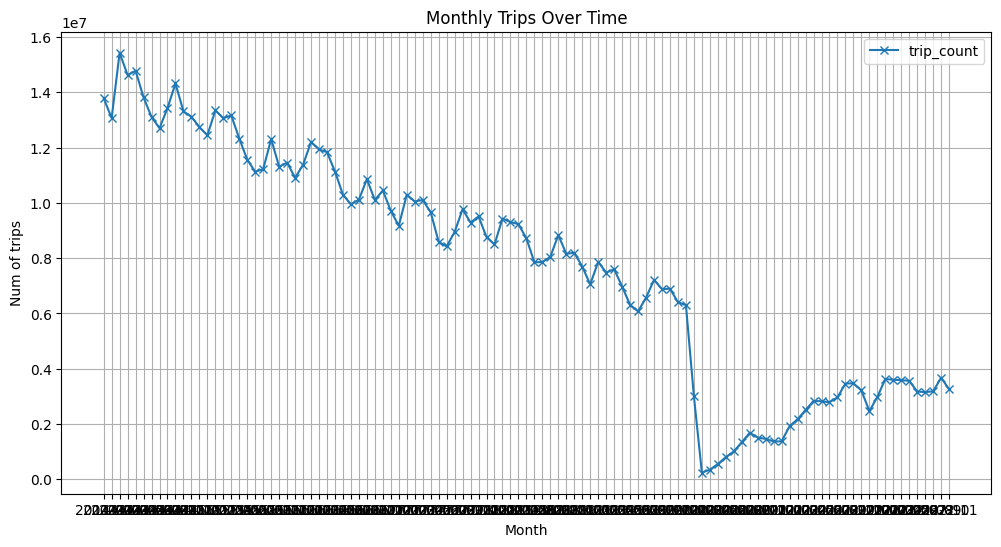

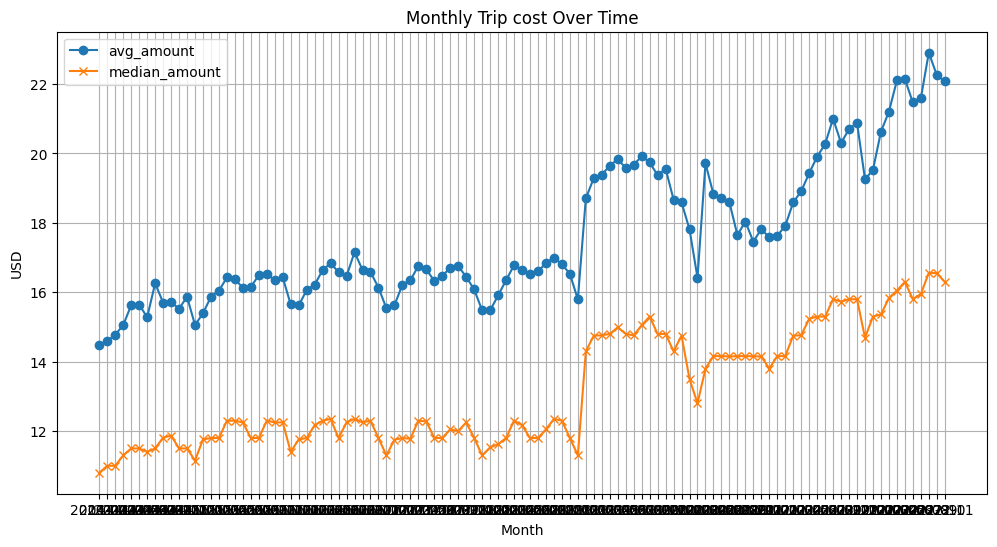

In [67]:
# Plot for trip metrics
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['trip_count'], label='trip_count', marker='x')
plt.title("Monthly Trips Over Time")
plt.xlabel("Month")
plt.ylabel("Num of trips")
plt.legend()
plt.grid(True)
plt.show()

# Plot for financial metrics
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['avg_amount'], label='avg_amount', marker='o')
plt.plot(monthly_data.index, monthly_data['median_amount'], label='median_amount', marker='x')
plt.title("Monthly Trip cost Over Time")
plt.xlabel("Month")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.show()